In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Synthetic five distinct classes dataset
np.random.seed(0)
X = np.random.randn(500, 2)
y = np.random.randint(0, 5, 500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 5

        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_HH = np.random.randn(hiddenLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)

        hidden_input2 = np.dot(self.hidden_output, self.W_HH)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        output_input = np.dot(self.hidden_output2, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden_error2 = output_delta.dot(self.W_OH.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error = hidden_delta2.dot(self.W_HH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_HH += self.hidden_output.T.dot(hidden_delta2)
        self.W_OH += self.hidden_output2.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

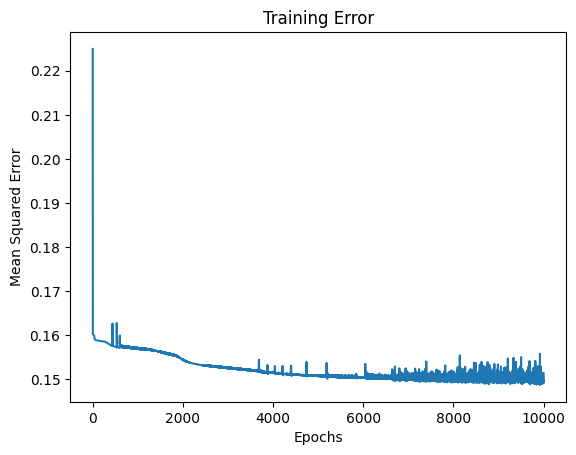

Accuracy: 0.18
              precision    recall  f1-score   support

           0       0.16      0.61      0.25        18
           1       0.24      0.22      0.23        18
           2       0.00      0.00      0.00        17
           3       0.25      0.09      0.13        23
           4       0.25      0.04      0.07        24

    accuracy                           0.18       100
   macro avg       0.18      0.19      0.14       100
weighted avg       0.19      0.18      0.13       100



In [ ]:

def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

NN = NeuralNetwork()
y_train_encoded = one_hot_encode(y_train, 5)
err = []
for i in range(10000):
    NN.train(X_train, y_train_encoded)
    pred_train = NN.feedForward(X_train)
    err.append(np.mean(np.square(y_train_encoded - pred_train)))

plt.plot(err)
plt.title("Training Error")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

pred_test = NN.feedForward(X_test)
y_pred = np.argmax(pred_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))